In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('diabetes_data.csv')
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


# Exploratory Data Analysis

In [3]:
df.shape

(100000, 9)

In [4]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [5]:
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


#### Gender & smoking history is of object dtype

In [7]:
df['diabetes'].value_counts()

diabetes
0    91500
1     8500
Name: count, dtype: int64

In [8]:
df['smoking_history'].value_counts()

smoking_history
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: count, dtype: int64

In [9]:
df['gender'].value_counts()

gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64

# Data Visualization

In [10]:
import seaborn as sns

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

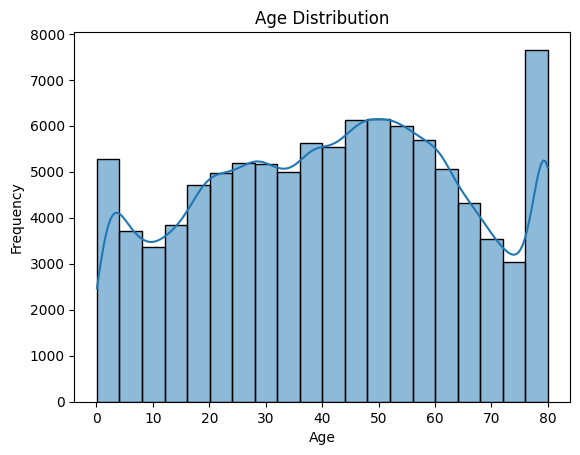

In [12]:
sns.histplot(data=df, x='age', bins=20, kde=True)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()

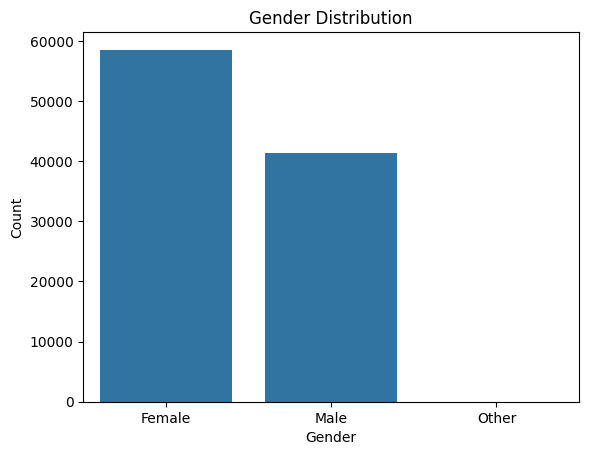

In [13]:
sns.countplot(data=df, x='gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')
plt.show()

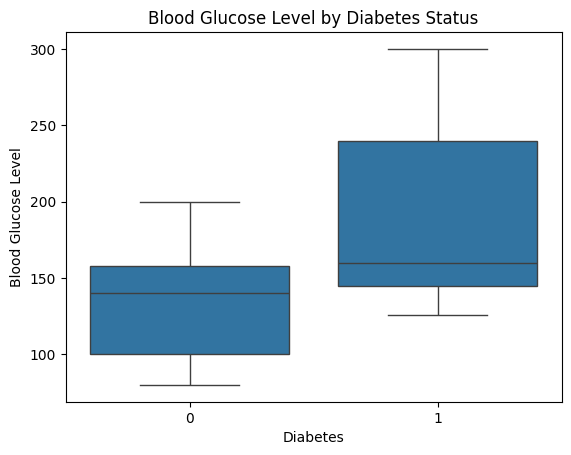

In [14]:
sns.boxplot(data=df, x='diabetes', y='blood_glucose_level')
plt.xlabel('Diabetes')
plt.ylabel('Blood Glucose Level')
plt.title('Blood Glucose Level by Diabetes Status')
plt.show()


In [15]:
df.head(1)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0


# Model

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
labelencoder=LabelEncoder()

In [18]:
df['gender']=labelencoder.fit_transform(df['gender'])
df['smoking_history']=labelencoder.fit_transform(df['smoking_history'])

In [19]:
df.head(2)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0


In [20]:
df[df['diabetes']==1]

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
6,0,44.0,0,0,4,19.31,6.5,200,1
26,1,67.0,0,1,5,27.32,6.5,200,1
38,1,50.0,1,0,1,27.32,5.7,260,1
40,1,73.0,0,0,3,25.91,9.0,160,1
53,0,53.0,0,0,3,27.32,7.0,159,1
...,...,...,...,...,...,...,...,...,...
99935,0,65.0,1,1,4,33.55,8.2,140,1
99938,1,55.0,0,1,3,30.42,6.2,300,1
99957,0,61.0,0,0,0,34.45,6.5,280,1
99962,0,58.0,1,0,4,38.31,7.0,200,1


In [21]:
df.gender.value_counts()

gender
0    58552
1    41430
2       18
Name: count, dtype: int64

In [22]:
df['smoking_history'].value_counts()

smoking_history
0    35816
4    35095
3     9352
1     9286
5     6447
2     4004
Name: count, dtype: int64

No Info      0
never or ever       4/2
former or not current          3/5
current        1

0->female
1->male


In [23]:
x=df.drop(['diabetes'],axis=1)
y=df['diabetes']

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [25]:
for i in [x_train,x_test,y_train,y_test]:
    print(i.shape)

(80000, 8)
(20000, 8)
(80000,)
(20000,)


In [26]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier()

In [27]:
clf.fit(x_train,y_train)

RandomForestClassifier()

In [28]:
train_score = clf.score(x_train,y_train)
val_score =clf.score(x_test,y_test)

print(f"Train score:{train_score}, val score : {val_score}")

Train score:0.9991625, val score : 0.9699


In [29]:
from sklearn.metrics import accuracy_score
y_pred=clf.predict(x_test)
score=accuracy_score(y_test,y_pred)*100
score

96.99

In [30]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, x, y, cv=5)
print(scores)

[0.97005 0.9711  0.968   0.97045 0.9703 ]


In [31]:
cross_val_score(RandomForestClassifier(n_estimators=40),x,y,cv=5)

array([0.97025, 0.9709 , 0.96775, 0.97055, 0.96985])

In [32]:
import pickle

pickle.dump(clf,open('model.pkl','wb'))